<a href="https://colab.research.google.com/github/NCodyBmi2024/VilcekSummerDataAnalysis2024_NC_Copy/blob/main/Intro_Python_Group_Project_BobRossPaintings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction - Analysis of Bob Ross Paintings Dataset

Bob Ross is a famous artist who inspired all ages to learn his method of painting by following his popular
TV series, ‘The Joy of Painting’, which ran on PBS from 1983-1994.

For this project our team selected a publicly available dataset containing the metadata for all paintings
featured in this popular TV show ‘The Joy of Painting”. This curated dataset was pulled from the GitHub
repository jwilber/BobRossPaintings which describes the upstream web-scraping of all the paintings
featured in TwoInchBrush.com resulting in the creation of a csv metadata file that we will be using for this
project.

Why is this dataset useful for our group project?  There is a lot of metadata stored in this GitRepo.  From the csv data and image files, and we can learn the structure and syntax of several common Python libraries covered during this summer course.  We question and try understand different facets of Bob Ross’ paintings through exploratory data analysis, comparative analysis, visualization and machine learning.  


# Data Source (GitHub csv)

---



In [ ]:
# Raw csv associated with this page https://github.com/jwilber/Bob_Ross_Paintings/blob/master/data/bob_ross_paintings.csv

# URL to the CSV file on GitHub (needed to navigate to the raw file)
url = "https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/bob_ross_paintings.csv"

# Read the CSV file into a DataFrame and get an overview
df_bob_ross_paintings = pd.read_csv(url)

display(df_bob_ross_paintings.head())

## There are also image (.png) files for each of his paintings in this git repo (used in Question 3)

# Raw URL of the image
# url = 'https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/paintings/painting10.png'



Unnamed: 0  painting_index  \
0           1             282   
1           2             283   
2           3             284   
3           4             285   
4           5             286   

                                             img_src       painting_title  \
0  https://www.twoinchbrush.com/images/painting28...  A Walk in the Woods   
1  https://www.twoinchbrush.com/images/painting28...         Mt. McKinley   
2  https://www.twoinchbrush.com/images/painting28...         Ebony Sunset   
3  https://www.twoinchbrush.com/images/painting28...          Winter Mist   
4  https://www.twoinchbrush.com/images/painting28...         Quiet Stream   

   season  episode  num_colors                                youtube_src  \
0       1        1           8  https://www.youtube.com/embed/oh5p5f5_-7A   
1       1        2           8  https://www.youtube.com/embed/RInDWhYceLU   
2       1        3           9  https://www.youtube.com/embed/UOziR7PoVco   
3       1        4           3  https://www.youtube.com/embed/0pwoixRikn4   
4       1        5           8  https://www.youtube.com/embed/DFSIQNjKRfk   

                                              colors  \
0  ['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...   
1  ['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...   
2  ['Alizarin Crimson', 'Black Gesso', 'Bright Re...   
3  ['Prussian Blue', 'Titanium White', 'Van Dyke ...   
4  ['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...   

                                           color_hex  ...  Liquid_Clear  \
0  ['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...  ...             0   
1  ['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...  ...             0   
2  ['#4E1500', '#000000', '#DB0000', '#FFEC00', '...  ...             0   
3                  ['#021E44', '#FFFFFF', '#221B15']  ...             0   
4  ['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...  ...             0   

   Midnight_Black  Phthalo_Blue  Phthalo_Green  Prussian_Blue  Sap_Green  \
0               0             0              1              1          1   
1               0             0              1              1          1   
2               0             0              1              1          1   
3               0             0              0              1          0   
4               0             0              1              1          1   

   Titanium_White  Van_Dyke_Brown  Yellow_Ochre  Alizarin_Crimson  
0               1               1             0                 1  
1               1               1             0                 1  
2               1               1             0                 1  
3               1               1             0                 0  
4               1               1             0                 1  

[5 rows x 28 columns]

# 1. Exploratory Data Analysis (Neal)

"What are the most commonly used colors in Bob Ross's paintings?"
"How are Color Brewer IDs distributed across different episodes or seasons?"
"How do you drill into the fine details (aka, and use the two inch brush) to see how his paintings are constructed"?

## Question 1. "What are the top ten most commonly used color pallets used in Bob's Paintings?

Total Number of paintings: 403


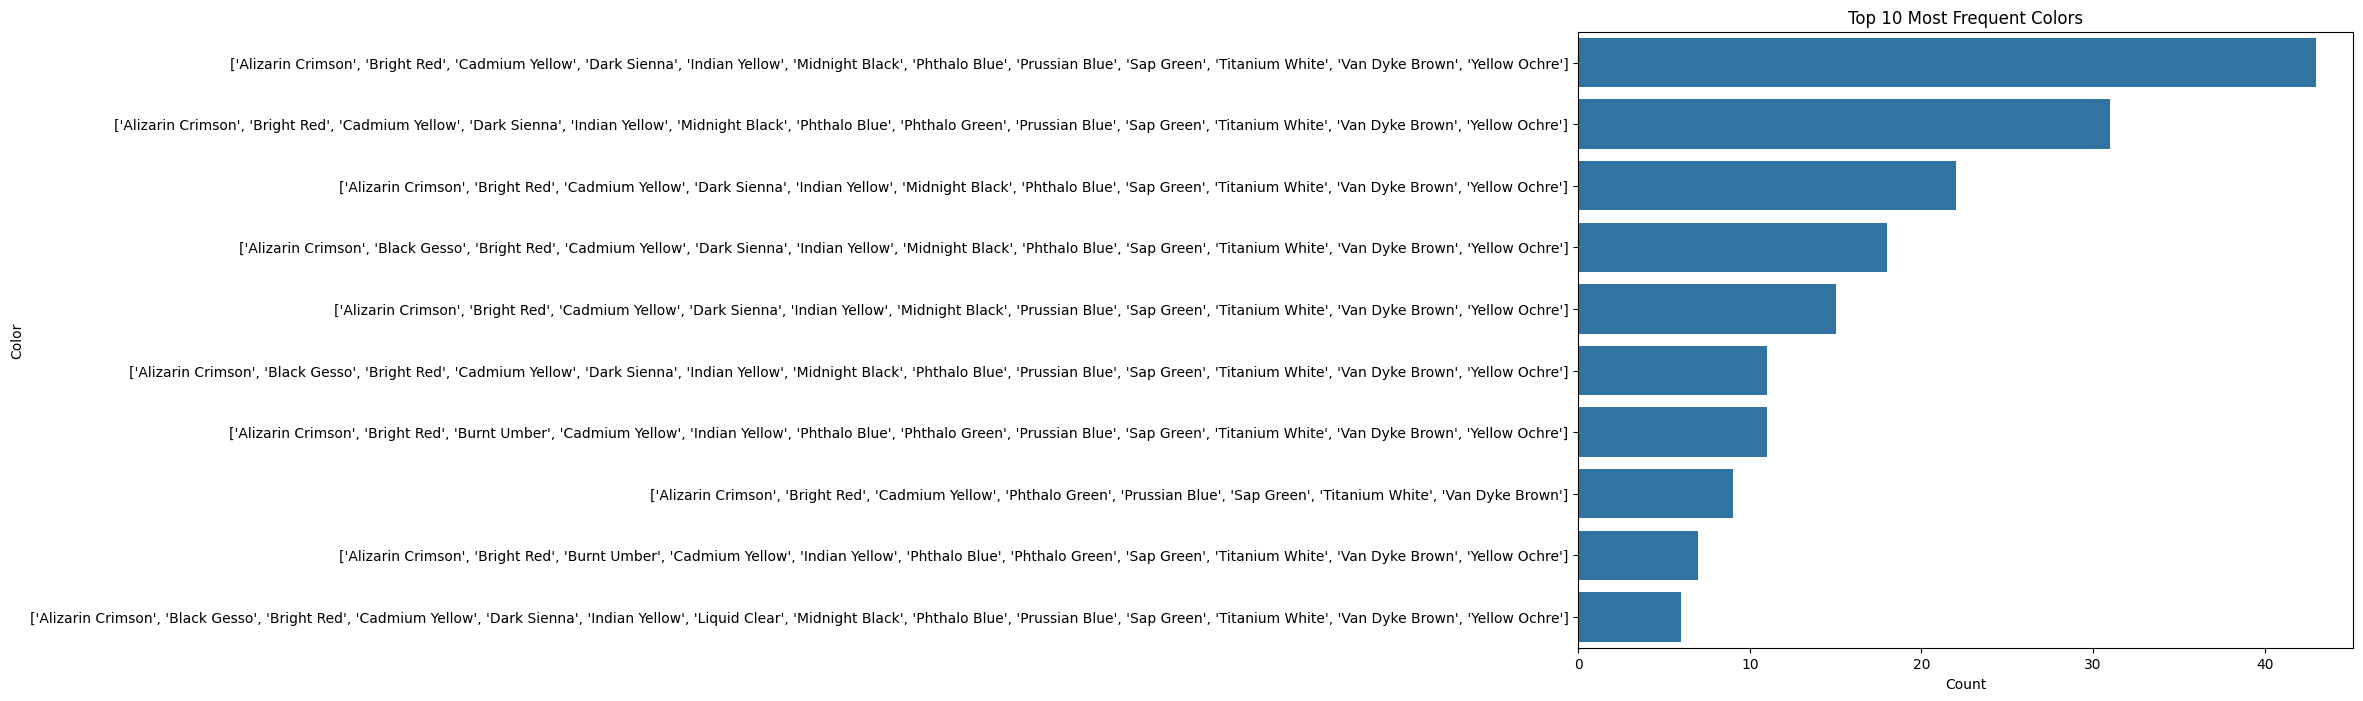

In [ ]:
## Question 1. "What are the top ten most commonly used colors pallets does Bob use in his paintings?  (total of 403 paintings)
## ChatGPT

num_paintings = len(df_bob_ross_paintings)
print(f'Total Number of paintings: {num_paintings}')

# Example: Count of unique colors
color_counts = df_bob_ross_paintings['colors'].explode().value_counts()

# Limit to top N color combinations
top_n = 10  #
color_counts = color_counts.head(top_n)

# Plot
plt.figure(figsize=(10, 8))  # Increase the figure size for better readability
sns.barplot(x=color_counts.values, y=color_counts.index)
plt.title('Top 10 Most Frequent Colors')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()




## Question 2: How do the color palettes vary by episodes and seasons?

In [ ]:
# Question 2. How do these color pallettes vary by episodes and seasons?

# Note in this dataframe, there are 13 episodes per season there are 31 seasons.  In order to get all rows to be unique, needed to expand and create a new column "season_episode" for Season1_Episode1 etc (e.g. S1_E1).

# CHATGPT Get Unique list of episodes
episodes = df_bob_ross_paintings['episode'].unique()

# Create the unique identifier for each season and episode combination
df_bob_ross_paintings['season_episode'] = 'S' + df_bob_ross_paintings['season'].astype(str) + '-E' + df_bob_ross_paintings['episode'].astype(str)

# Display the first few rows to verify the new column
print(df_bob_ross_paintings[['season', 'episode', 'season_episode']].head())

print(df_bob_ross_paintings)


   season  episode season_episode
0       1        1          S1-E1
1       1        2          S1-E2
2       1        3          S1-E3
3       1        4          S1-E4
4       1        5          S1-E5
     Unnamed: 0  painting_index  \
0             1             282   
1             2             283   
2             3             284   
3             4             285   
4             5             286   
..          ...             ...   
398         399             407   
399         400             408   
400         401             409   
401         402             410   
402         403             411   

                                               img_src  \
0    https://www.twoinchbrush.com/images/painting28...   
1    https://www.twoinchbrush.com/images/painting28...   
2    https://www.twoinchbrush.com/images/painting28...   
3    https://www.twoinchbrush.com/images/painting28...   
4    https://www.twoinchbrush.com/images/painting28...   
..                         

In [ ]:
# CHATGPT was used: Jaccard similarity matrix is a measure used to quantify the similarity between sets and then view the results in a heatmap.

# started by getting a list of unique season_episode
episodes = df_bob_ross_paintings['season_episode'].unique()

# Created an empty dictionary to store sets of colors for each season_episode
episode_colors = {episode: set(df_bob_ross_paintings[df_bob_ross_paintings['season_episode'] == episode]['colors'].explode()) for episode in episodes}

# Created an empty DataFrame to store Jaccard Similarity values
jaccard_df = pd.DataFrame(index=episodes, columns=episodes)

# Compute Jaccard Similarity for each pair of season_episode
for episode1 in episodes:                                                                   # This loop was used to compare the episode1_colors with every other episode (including itself).
    for episode2 in episodes:                                                               # This line starts another loop over each episode in the episodes list. The variable episode2 will take on each episode identifier one by one, allowing you to compare episode1 with episode2.
        intersection = len(episode_colors[episode1].intersection(episode_colors[episode2])) # computes the intersection of the two sets, i.e., the set of colors that are present in both episodes.
        union = len(episode_colors[episode1].union(episode_colors[episode2]))               # calculates the number of elements in this union, which represents the total number of unique colors used in both episodes combined.
        jaccard_similarity = intersection / union if union != 0 else 0                      # computes the Jaccard similarity index, which is the ratio of the number of common colors to the total number of unique colors
        jaccard_df.loc[episode1, episode2] = jaccard_similarity                             # accesses the dataframe above and assigns the calculated Jaccard similarity value to this cell.

# Convert to numeric values
jaccard_df = jaccard_df.apply(pd.to_numeric)

# Display the Jaccard Similarity DataFrame
print(jaccard_df)

# appears to be only 0.0 or 1.0 no gradient of values.

         S1-E1  S1-E2  S1-E3  S1-E4  S1-E5  S1-E6  S1-E7  S1-E8  S1-E9  \
S1-E1      1.0    1.0    0.0    0.0    1.0    0.0    1.0    1.0    1.0   
S1-E2      1.0    1.0    0.0    0.0    1.0    0.0    1.0    1.0    1.0   
S1-E3      0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
S1-E4      0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
S1-E5      1.0    1.0    0.0    0.0    1.0    0.0    1.0    1.0    1.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...   
S31-E9     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
S31-E10    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
S31-E11    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
S31-E12    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
S31-E13    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         S1-E10  ...  S31-E4  S31-E5  S31-E6  S31-E7  S31-E8  S31-E9  S31-E10  \
S1-E1       1.0  ...     0.0  

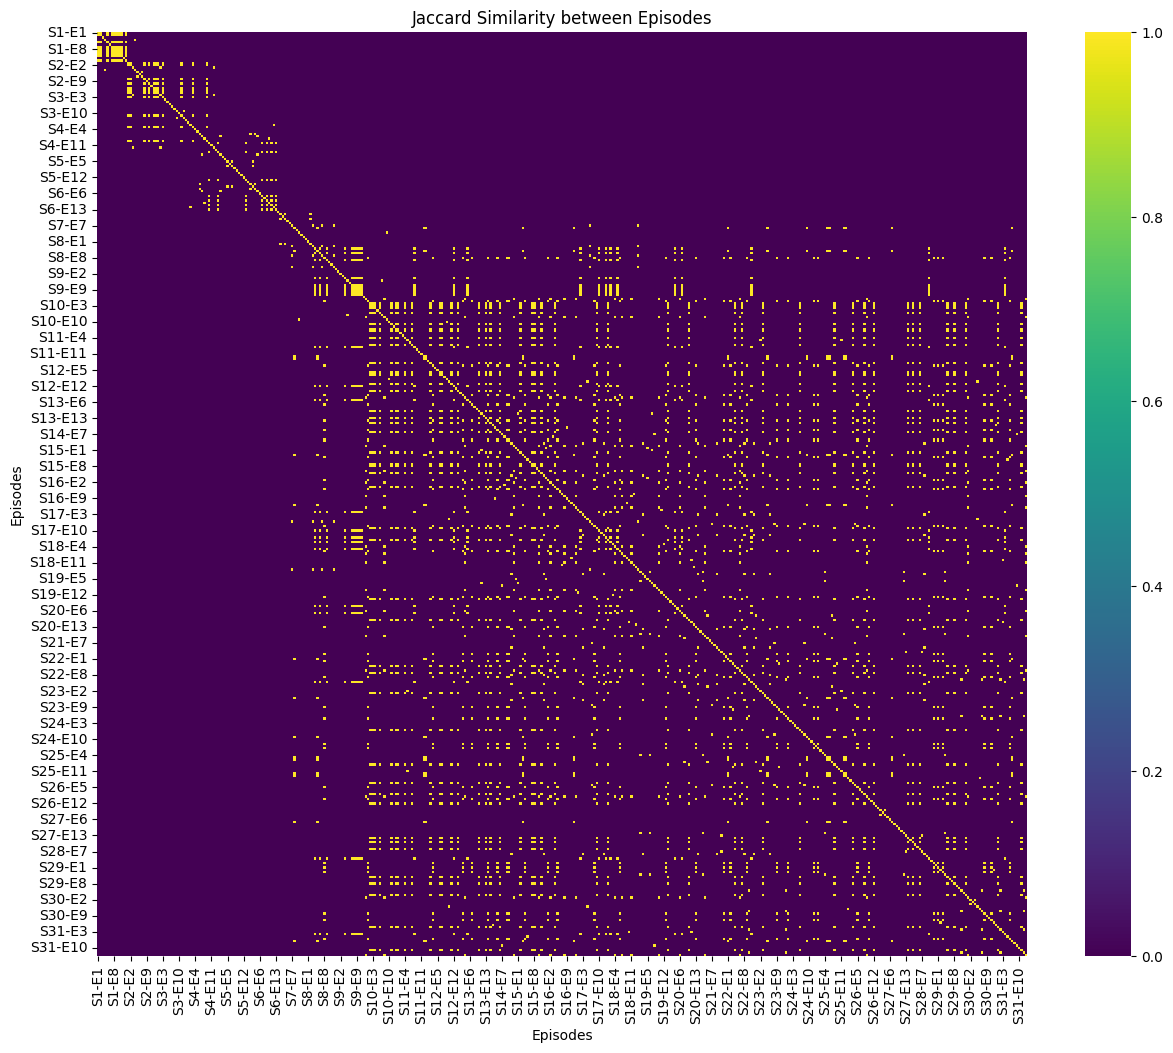

In [ ]:

#CHATGPT: Plotted the Jaccard Similarity matrix using heatmap without annotations; use Seaborn for visualization

plt.figure(figsize=(15, 12))
sns.heatmap(jaccard_df, cmap='viridis', annot=False, cbar=True)
plt.title('Jaccard Similarity between Episodes')
plt.xlabel('Episodes')
plt.ylabel('Episodes')
plt.show()

# EDA - Here it appears that the earlier seasons had similar type of colors as compared to later seasons (after season 9 an expansive use of overlapping color palette combinations as opposed to the earlier seasons).
# Especially the first 9 seasons(and episodes) for example have unique palletes that were not used in later shows

# Challenges encountered: the heatmap legend on the plot shows a range, when in fact the values are binary (0, or 1), so the legend/scale at present is misleading.
# Would need to go "back the the drawing board" to think about how to represent the colors in each episode a bit differently, however I did gain insights about the uses of colors across seasons, which was of primary interest

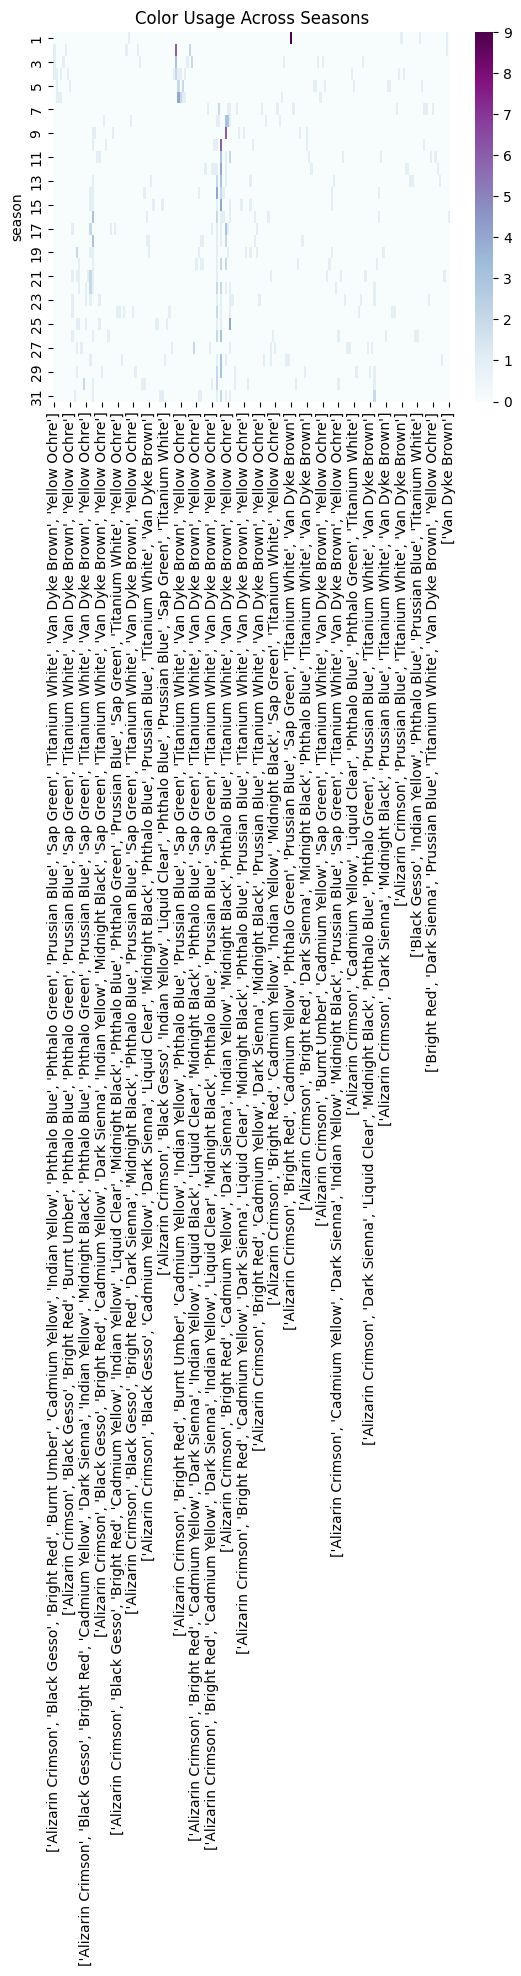

In [ ]:
# Question 1 (continued): How do these color pallettes vary by episodes and seasons?
# Just to be sure on the right track with the Similarity matrix, tried another simplier visualization (heatmap)

# This below example is another shot at this question, while not as complelling as above, but another way to see this perhaps and you can see similar partition of coolors
color_usage = df_bob_ross_paintings.groupby('season')['colors'].apply(lambda x: x.explode().value_counts()).unstack().fillna(0)
sns.heatmap(color_usage, cmap='BuPu')
plt.title('Color Usage Across Seasons')
plt.show()

# generally shows similar a output but not as visually compelling as the similarity matrix above.



## Question 3: How did Bob describe his paintings in the titles of his TV episodes?  Try a word cloud approach on the full dataset.  

[('mountain', 45), ('the', 40), ('winter', 40), ('of', 27), ('s', 23), ('oval', 22), ('in', 18), ('autumn', 18), ('lake', 16), ('cabin', 15)]


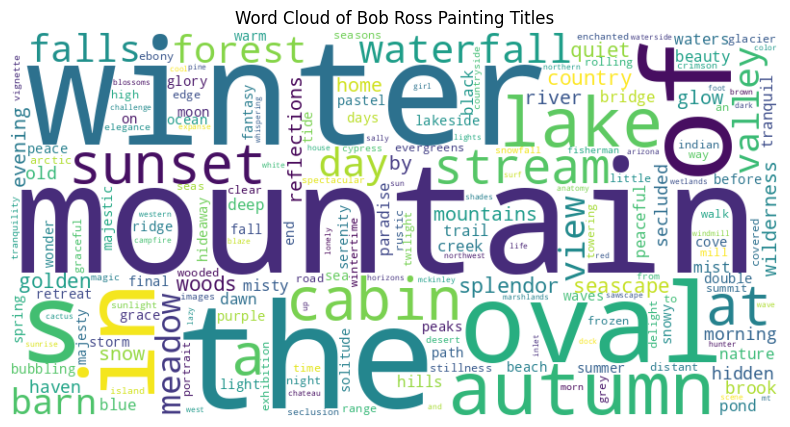

In [ ]:
# Question: How did he describe his paintings?  Here we look at the titles of all the paintings (below).

# CHATGPT Extract the titles
titles = df_bob_ross_paintings['painting_title']

from collections import Counter
import re

# Tokenize the titles
tokens = [re.findall(r'\b\w+\b', title.lower()) for title in titles]
flat_tokens = [item for sublist in tokens for item in sublist]

# Count the frequency of each word
word_counts = Counter(flat_tokens)

# Display the most common words
print(word_counts.most_common(10))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Bob Ross' Painting Titles')
plt.show()

# Challenges: it would have been more intersting to subset this type of work given the EDA above in the Jaccard Similarity analysis revealings the uses of colors changed over the episodes/seasons



## Question 4. Can one extract the digital signature of a painting? How can extracted images of his paintngs be deconstructed to more basic features for further downstream analysis?

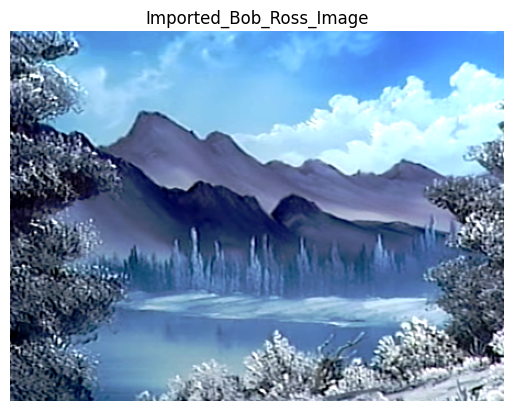

In [ ]:
## Question 4 (EDA): Can one extract the digital signature of a painting? How can extracted images of his paintngs be deconstructed to more basic features for further downstream analysis?

## ChatGPT was used to help generate and fix the code below to learn to import an image, get an 'R-B-G' signature, and then reconstruct that image from and RBG dataframe.

# Checking in with the png files to see what we have there.

import cv2
import numpy as np
import requests

# Raw URL of the image
url = 'https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/paintings/painting10.png'

# Fetch the image
response = requests.get(url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert BGR to RGB for displaying
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
from matplotlib import pyplot as plt
plt.imshow(img_rgb)
plt.title('Imported_Bob_Ross_Image')
plt.axis('off')
plt.show()

# This works and it was fun to see how this could potentially open up new questions.  One challenge is how to iterate over many paintings. It would be painful to write out the url for all 400 images.
# Future directions part 1: Write a function that reads in the urls. Extract all images into a single dataframe for further exploration the trends in paint colors used over the seasons/episodes.

# Challenge remains: how to interpret the output of R-G-B dataframe (pixel by pixel representation of these paintings)??  Started with simple visulizations for now (boxplots)
# Future directions part 2: carve out large dataframe for all paintings, supervised cluster analysis and heatmaps to further explore trends across seasons episodes coorborating with the earlier EDA discoveries


<ipython-input-22-0f4163e19161>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Color', y='Value', data=color_data, palette='coolwarm')


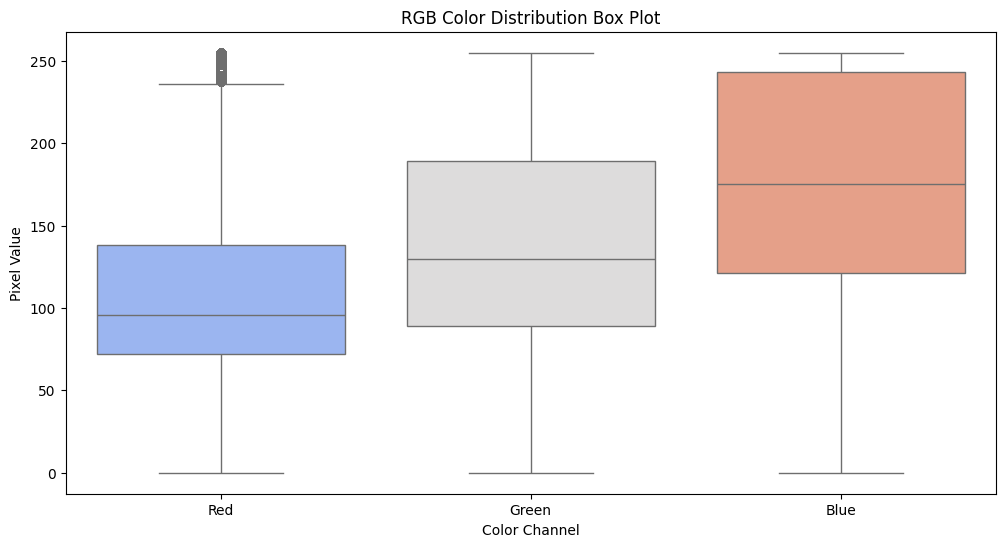

In [ ]:
## Question 4 (EDA): Can one extract the digital signature of a painting? How can extracted images of his paintngs be deconstructed to more basic features for further downstream analysis?

# ChatGPT used to explore future directions attempt #1.  To address this question, one first needs to learn how to transform an "R-B-G" dataframe and try and recreate the image again from those extracted numeric values.

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the image into R, G, and B channels - flattens and first pixel in top left corner would be extracted top to bottom, left to right
red_channel = img_rgb[:, :, 0].ravel()
green_channel = img_rgb[:, :, 1].ravel()
blue_channel = img_rgb[:, :, 2].ravel()

# Create a DataFrame for the box plot
color_data = pd.DataFrame({
    'Color': ['Red'] * len(red_channel) + ['Green'] * len(green_channel) + ['Blue'] * len(blue_channel),
    'Value': np.concatenate([red_channel, green_channel, blue_channel])
})

# Create box plots using Seaborn library
plt.figure(figsize=(12, 6))
sns.boxplot(x='Color', y='Value', data=color_data, palette='coolwarm')
plt.title('RGB Color Distribution Box Plot')
plt.xlabel('Color Channel')
plt.ylabel('Pixel Value')
plt.show()

# Future directions you could possibly subset, group or modify the R-B-G signature and try to see what happens to the output.

Width: 450, Height: 337, Channels: 3


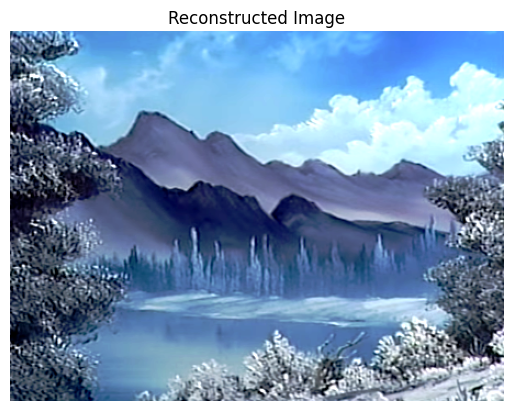

In [ ]:
## Question 4 (EDA) continued: Can one extract the digital signature of a painting? How can extracted images of his paintngs be deconstructed to more basic features for further downstream analysis?

# Future directions attempt # 1.  From the RGB dataframe consisting of a numeric value at each pixel in the image, can you can reconstruct the image from these values?

url = 'https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/paintings/painting10.png'
response = requests.get(url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert BGR to RGB for displaying
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width, channels = img.shape
print(f"Width: {width}, Height: {height}, Channels: {channels}")

# Separate the DataFrame into color channels
red_values = color_data[color_data['Color'] == 'Red']['Value'].values
green_values = color_data[color_data['Color'] == 'Green']['Value'].values
blue_values = color_data[color_data['Color'] == 'Blue']['Value'].values

# Reshape the 1D arrays back to 2D
red_channel = red_values.reshape((height, width))
green_channel = green_values.reshape((height, width))
blue_channel = blue_values.reshape((height, width))

# Stack the 2D arrays to create a 3D image array
reconstructed_image = np.stack([red_channel, green_channel, blue_channel], axis=-1).astype(np.uint8)

# Display the reconstructed image
plt.imshow(reconstructed_image)
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

# This was just a proof of concept, but now you have a method for taking an image,
# creating a dataframe from it, and then using that dataframe to reconstruct or modify features of the painting.
# If you were to create a large dataframe of many images, one could do more interesting analyses (clustering/visualization across seasons but with perhas more granularity at the pixel level rather than generic color names)


In [ ]:
# Question 4 (EDA) continued... aim do the same steps as above, only grab more URL links of images and create a large dataframe for further analysis (vizualization or machine learning etc)

# CHATGPT Future directions attempt # 3.  Should learn to define a function instead of reading in each image URL one at a time.

import cv2
import numpy as np
import pandas as pd
import requests
from io import BytesIO

# List of URLs for the images. R. # in future iteration of this code, I would have defined a function to read in the image files, rather than copy the URLs.  We have >400 images!
urls = [
    'https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/paintings/painting10.png',
    'https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/paintings/painting11.png',
    'https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/paintings/painting12.png',
    'https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/paintings/painting13.png',
    'https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/paintings/painting14.png',
    'https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/paintings/painting15.png',
]

# Initialize lists to hold DataFrames
color_data_list = []

# Process each image
for url in urls:
    # Fetch the image
    response = requests.get(url)
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Convert BGR to RGB for displaying
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    height, width, channels = img.shape

    # Separate the image into R, G, and B channels
    red_channel = img_rgb[:, :, 0].ravel()
    green_channel = img_rgb[:, :, 1].ravel()
    blue_channel = img_rgb[:, :, 2].ravel()

    # Create a DataFrame for the current image
    image_df = pd.DataFrame({
        'Color': ['Red'] * len(red_channel) + ['Green'] * len(green_channel) + ['Blue'] * len(blue_channel),
        'Value': np.concatenate([red_channel, green_channel, blue_channel]),
        'Image': url  # Include image URL or identifier
    })

    # Append the DataFrame to the list
    color_data_list.append(image_df)

# Combine all DataFrames into one master DataFrame
master_df = pd.concat(color_data_list, ignore_index=True)

# Optionally, save the master DataFrame to a CSV file
master_df.to_csv('master_rgb_data.csv', index=False)

print(f"Master DataFrame created with shape: {master_df.shape}")


Master DataFrame created with shape: (2729700, 3)


# 2. Comparative Analysis (Ruby)

### **1.Frequency of the colors used in all seasons**

  a. a general barplot

  b.  a barplot with the colors mapped to the colors in Bob Ross' painting

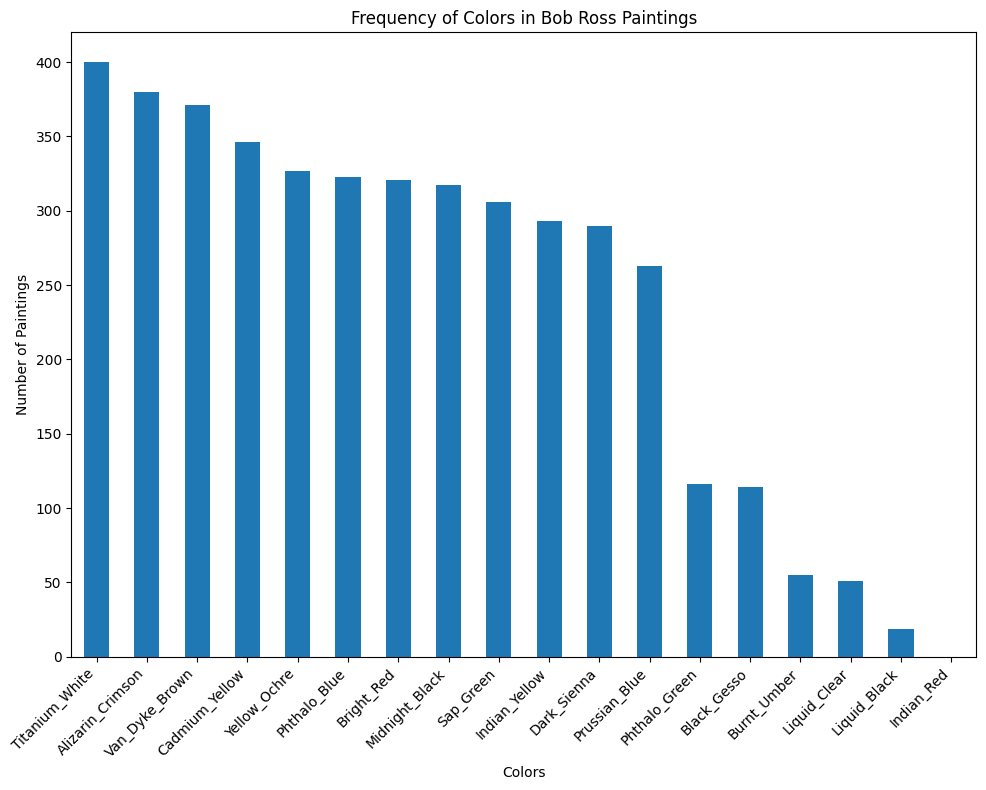

In [ ]:
# 1. Frequency of colors in paintings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#reading csv
bobross = pd.read_csv('/content/bob_ross_paintings.csv')

#a. general bar plot
#frequency of each color
color_column = ['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black', 'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green', 'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown', 'Yellow_Ochre', 'Alizarin_Crimson']
color_usage = bobross[color_column].sum().sort_values(ascending=False)

#bar plot
plt.figure(figsize=(10, 8))
color_usage.plot(kind='bar')
plt.title('Frequency of Colors in Bob Ross Paintings')
plt.xlabel('Colors')
plt.ylabel('Number of Paintings')
plt.xticks(rotation=45, ha='right') #rotation to 45 prevents names of colors from overlapping
plt.tight_layout()
plt.show()

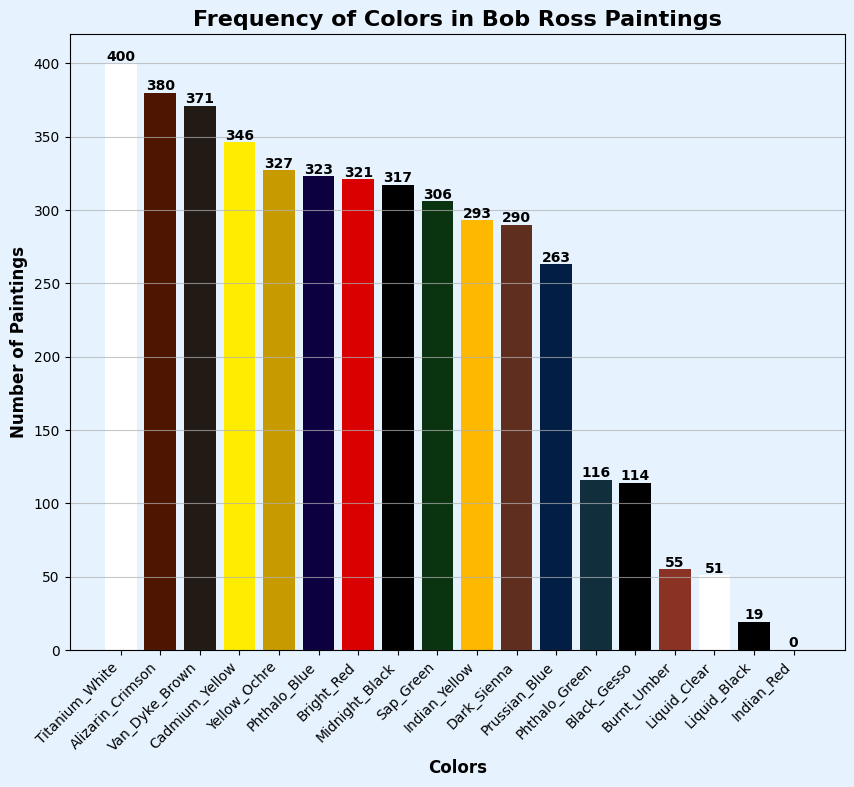

In [ ]:
#b. adding colors to bar plots
#color mapping
color_map = {
    'Black_Gesso': '#000000',
    'Bright_Red': '#DB0000',
    'Burnt_Umber': '#8A3324',
    'Cadmium_Yellow': '#FFEC00',
    'Dark_Sienna': '#5F2E1F',
    'Indian_Red': '#CD5C5C',
    'Indian_Yellow': '#FFB800',
    'Liquid_Black': '#000000',
    'Liquid_Clear': '#FFFFFF',
    'Midnight_Black': '#000000',
    'Phthalo_Blue': '#0C0040',
    'Phthalo_Green': '#102E3C',
    'Prussian_Blue': '#021E44',
    'Sap_Green': '#0A3410',
    'Titanium_White': '#FFFFFF',
    'Van_Dyke_Brown': '#221B15',
    'Yellow_Ochre': '#C79B00',
    'Alizarin_Crimson': '#4E1500'
}

#frequency of each color
color_col = list(color_map.keys())
color_usage = bobross[color_col].sum().sort_values(ascending=False)

#bar plot
plt.figure(figsize=(10, 8), facecolor='#E6F3FF')  #light blue background
ax = plt.axes()
ax.set_facecolor('#E6F3FF')  #light blue background for the plot area

bar_plot = plt.bar(color_usage.index, color_usage.values, color=[color_map[c] for c in color_usage.index])

#value labels on top of each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height}', ha='center', va='bottom', fontweight='bold')

plt.title('Frequency of Colors in Bob Ross Paintings', fontsize=16, fontweight='bold')
plt.xlabel('Colors', fontsize=12, fontweight='bold')
plt.ylabel('Number of Paintings', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

#gridlines
plt.grid(axis='y', alpha=0.7)
plt.show()



### Challenges faced in creating this visualization:

Selecting the right shade of background color to enhance readability without overshadowing the data.Addressing the overlapping of color names on the x-axis, which affects legibility.
Placing and formatting the frequency numbers on top of each bar to ensure they're visible and don't clutter the chart.


## **2. Similarities and temporal analysis**

  a. Color palette similarities
  
  b. Temporal analysis of colors

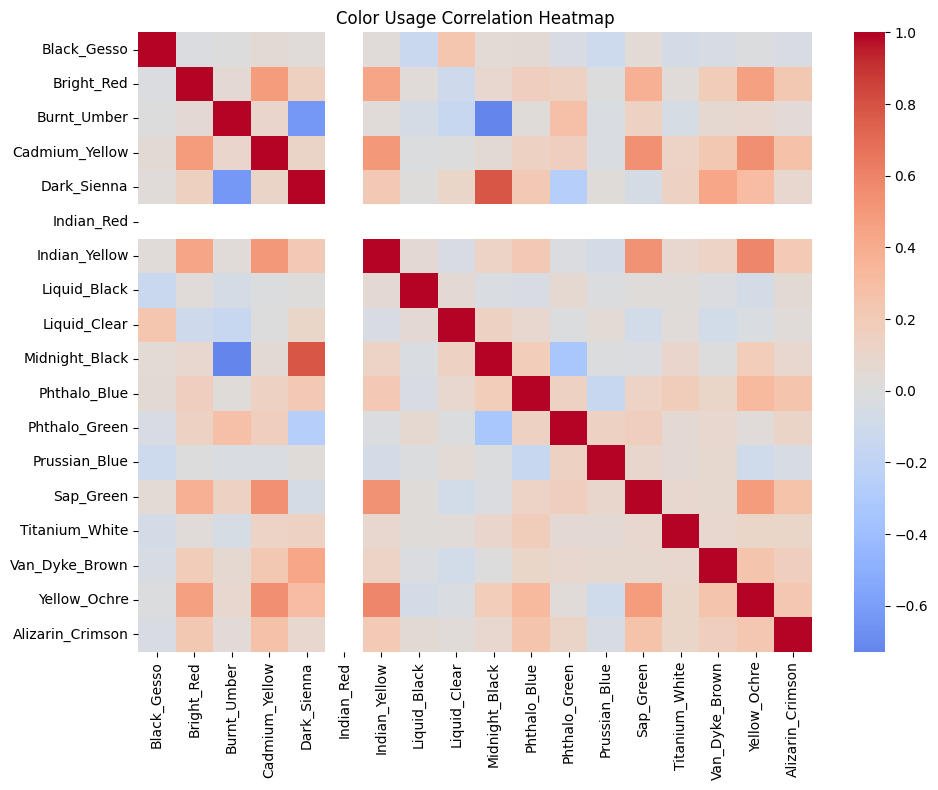

In [ ]:
#a. color palette similarities
# Converting season and episode to numeric types
bobross['season'] = pd.to_numeric(bobross['season'])
bobross['episode'] = pd.to_numeric(bobross['episode'])

#list of all color columns
color_column = ['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black', 'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green', 'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown', 'Yellow_Ochre', 'Alizarin_Crimson']

# Calculating the correlation matrix for color usage
color_correlation = bobross[color_column].corr()

# Plotting a heatmap of color correlations
plt.figure(figsize=(10, 8))
sns.heatmap(color_correlation, annot=False, cmap='coolwarm', center=0)
plt.title('Color Usage Correlation Heatmap')
plt.tight_layout()
plt.show()


### a. Color palette similarities

This heatmap eveals that while Bob Ross had some preferred color combinations,The strongest relationships appear among similar color families (warm with warm, cool with cool), but there's also evidence of diverse color mixing throughout his work.

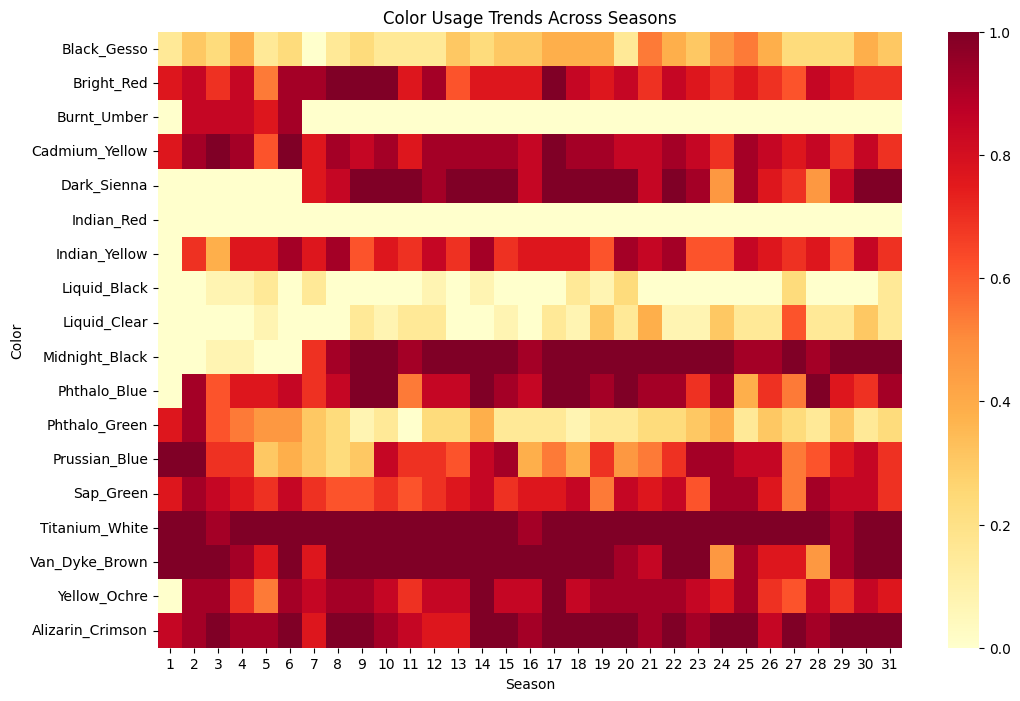

In [ ]:
#b. Temporal analysis of colors

#average number of colors used per season
colors_per_season = bobross.groupby('season')[color_column].mean()

#Plotting the trend of color usage over seasons
fig=plt.figure(figsize=(12, 8))
sns.heatmap(colors_per_season.T, cmap='YlOrRd')
plt.title('Color Usage Trends Across Seasons')
plt.xlabel('Season')
plt.ylabel('Color')
plt.show()

### b. Temporal analysis of colors

This heatmap visualizes the color usage trends across the 31 seasons. It uses a YlOrRd (Yellow-Orange-Red) color scheme, where darker red indicates higher frequency of use, and lighter yellow indicates lower frequency.

Dark Sienna seems to have been introduced later in the series, showing more usage from around season 7 onwards.

Burnt Umber shows high usage in early seasons but becomes less frequent in later seasons.

Midnight Black appears to increase in usage in later seasons.

Indian red is mentioned in the csv file however, the color was not used in any of his paintings so this might be an error is the original data collection.

## **3. Number of colors used in each season**

  a. violin plot using kde
  
  b. violin plot using cut

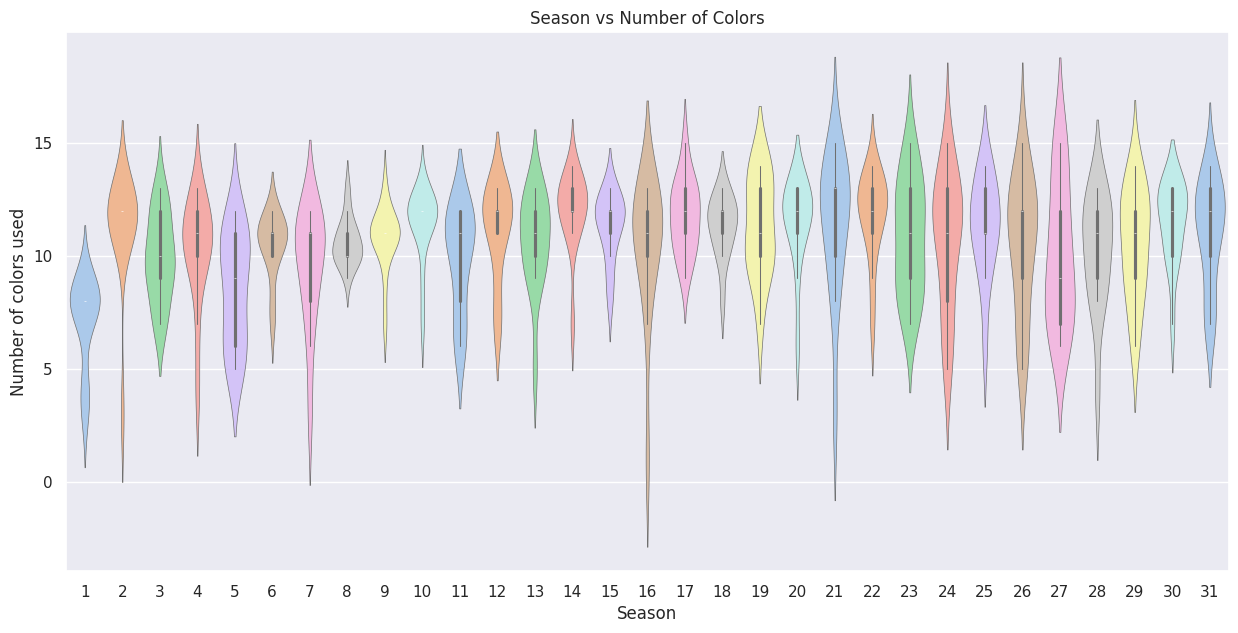

In [ ]:

#season against colors - kde
sns.set_theme(rc={'figure.figsize':(15,7)})
season_color = sns.violinplot(data=bobross, y='num_colors', x='season', hue= 'season', palette= 'pastel', linewidth= 0.5, legend= False)
season_color.set_xlabel('Season')
season_color.set_ylabel('Number of colors used')
season_color.set_title('Season vs Number of Colors')
plt.show()



### a. Violin plot using KDE
The violins extend beyond the actual data range, particularly noticeable in season 16 where it dips below 0. The KDE can sometimes lead to misinterpretation, especially when it extends to impossible values (like negative color counts)

-- KDE provides a smoother and more continuous representation of the data distribution sometimes leading to exxagerating the tails of distribution

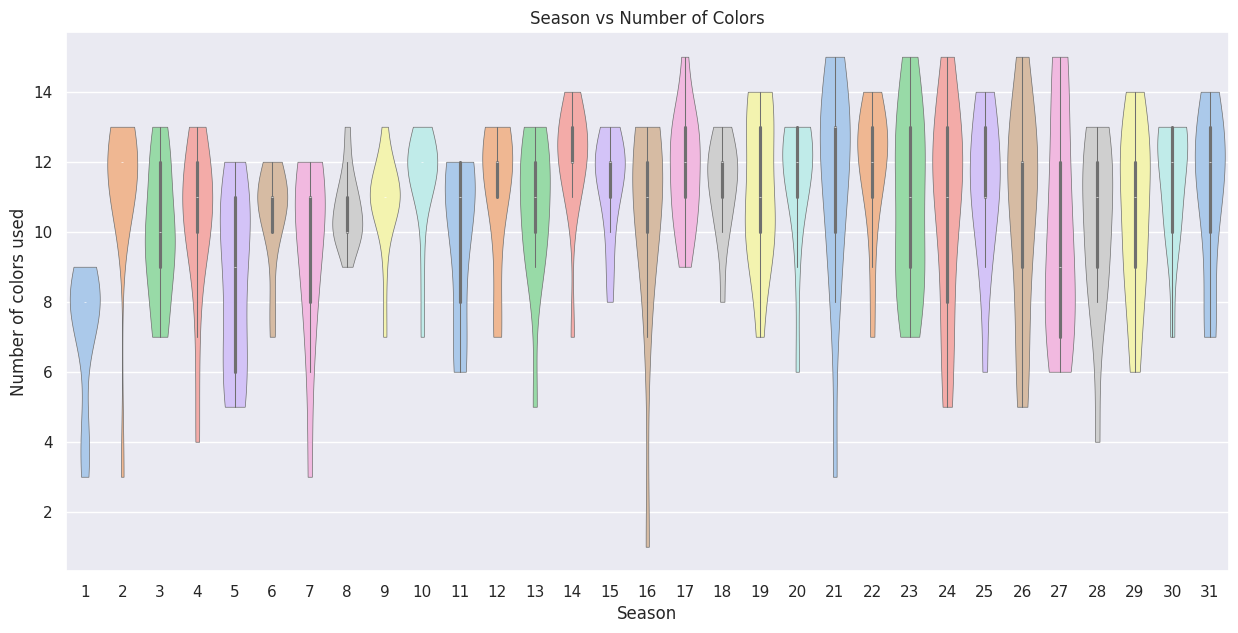

In [ ]:
#season against colors- cutting
sns.set_theme(rc={'figure.figsize':(15,7)})
season_color = sns.violinplot(data=bobross, y='num_colors', x='season', hue= 'season', palette= 'pastel', linewidth= 0.5, cut=0, legend= False)

#labels
season_color.set_xlabel('Season')
season_color.set_ylabel('Number of colors used')
season_color.set_title('Season vs Number of Colors')
plt.show()

### b. Violin plot using cut
It provides a more accurate representation of the true data distribution

The violins are truncated at the minimum and maximum values of the actual data and gives a clearer view of the data boundaries and prevents misinterpretation.

### **4. Grouping season from 1 to 10; 11 to 20; 21 to 31 - analysing using bar plot to view distribution**



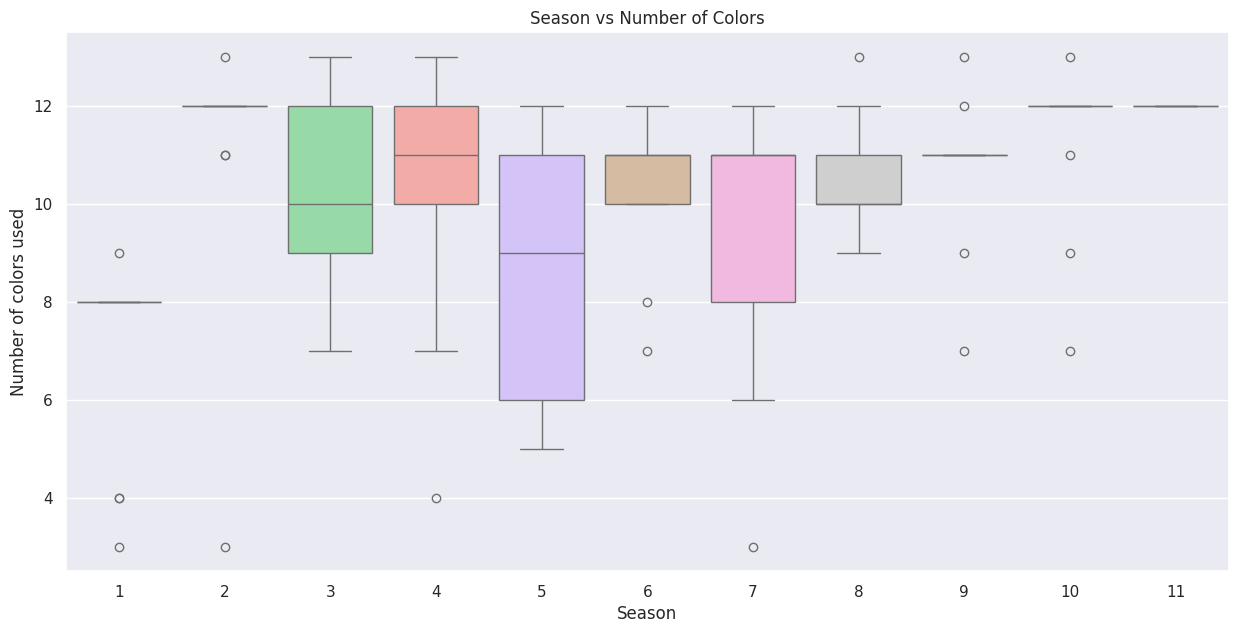

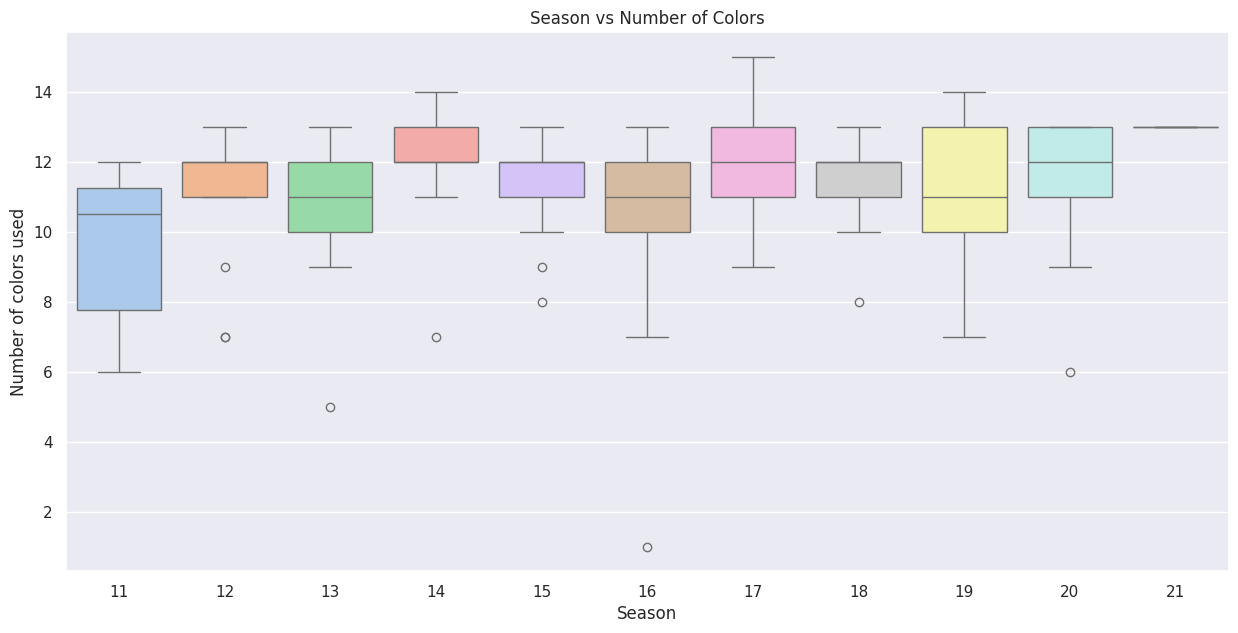

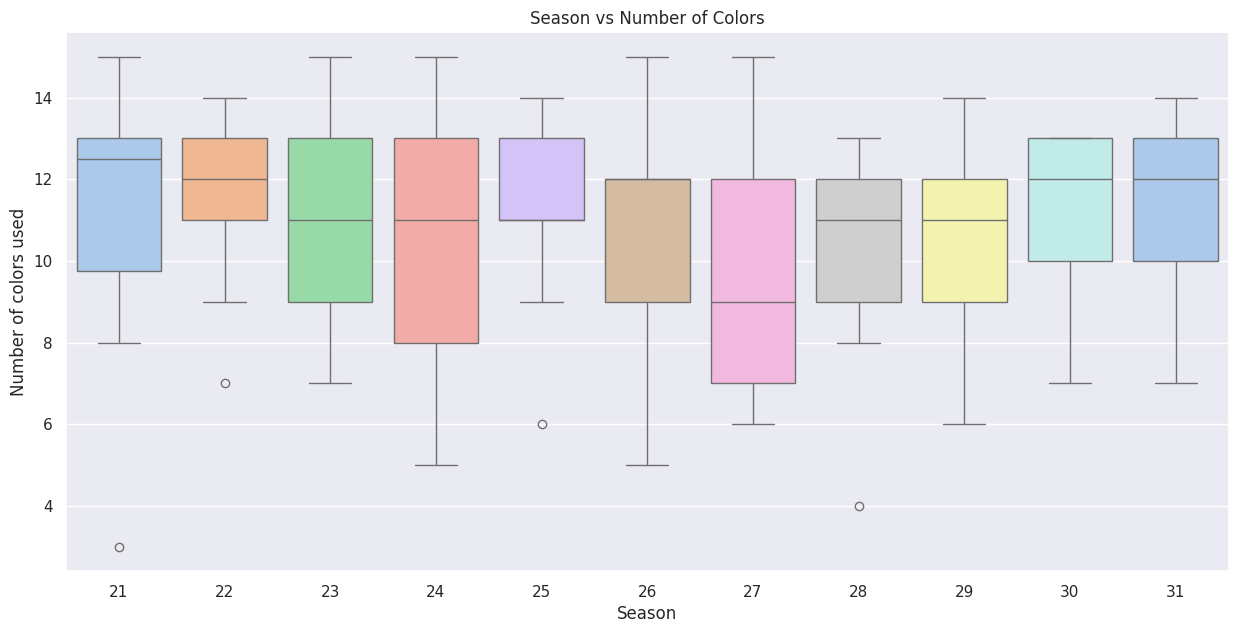

In [ ]:

#making box plot with 1 to 11; 11 to 22; 21 to 31
season1_10 = bobross[:131][['season','num_colors']]
season11_20 = bobross[131:261][['season','num_colors']]
season21_31 = bobross[261:][['season','num_colors']]

# 1 to 11
OneToEleven = sns.boxplot(season1_10, x='season', y= 'num_colors', hue= 'season', palette= 'pastel', legend= False)

#labels
OneToEleven.set_xlabel('Season')
OneToEleven.set_ylabel('Number of colors used')
OneToEleven.set_title('Season vs Number of Colors')
plt.show()

#11 to 21
ElevenToTwentyone = sns.boxplot(season11_20, x='season', y= 'num_colors', hue= 'season', palette= 'pastel', legend= False)

#labels
ElevenToTwentyone.set_xlabel('Season')
ElevenToTwentyone.set_ylabel('Number of colors used')
ElevenToTwentyone.set_title('Season vs Number of Colors')
plt.show()

#21 to 31
TwentyOneToThirtyOne = sns.boxplot(season21_31, x='season', y= 'num_colors', hue= 'season', palette= 'pastel', legend= False)

#labels
TwentyOneToThirtyOne.set_xlabel('Season')
TwentyOneToThirtyOne.set_ylabel('Number of colors used')
TwentyOneToThirtyOne.set_title('Season vs Number of Colors')
plt.show()


### Box plot (a)
For seasons 1, 2, 9, 10, and 11, this suggests that Bob Ross used a very consistent number of colors across most episodes within each of these seasons.


## Box plot (b)
The median number of colors used is generally higher, mostly between 11 and 12. There's less variation within seasons compared to the earlier seasons. Except for season 16.

## Box plot (c)
The median color usage remains relatively high, similar to seasons 11-21.There's more variation in some seasons (e.g., 24, 27) compared to others

This observation provides interesting insight into Bob Ross's painting approach, suggesting periods of high consistency in his color palette usage, alternating with periods of more variation

# 3. Visualization (Siddhya)

Used ChatGPT for overall ideas on how to approach the dataset, and took help from StackOverflow and Gemini with coding.

Libraries used:

pandas: for data analysis

*   matplotlib: for plotting in python

*   pyplot: for making plots and charts
  *   image: to read and manipulate image data
  *   PIL and image: creating and processing images

*   requests*: to send requests to web servers, fetch web content and to download files, retrieve data from web services, etc.

*   Plotly: for visualisation
  *   express: interative visualisation
  *   graph_objects: customization of plots



Tried using different libraries to visualise similar data to explore mentioned libraries and get an idea of how to answer these questions





















***Q1. What is the name of the painting and the painting itself when a user enters a season and episode number?***

Problems encountered:
1. How to print an image from a link in the dataset?

  *   Used StackOverflow and ChatGPT to help with the syntax


2. How to use the user inputs as information for the functions?
   
   *   Initally had them as separate commands, which showed an error; then defined a function that takes the user inputs and calls the other two functions, and that resolved this issue.



Enter a season number from 1 to 31. Then enter a episode number from 1 to 13
Enter a season number:1
Enter a episode number:13
Season 1, Episode 13: Final Reflections 


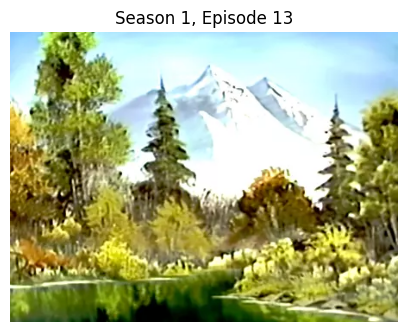

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/bob_ross_paintings.csv"
bross_data = pd.read_csv(url)

bross_data['season'] = pd.to_numeric(bross_data['season'])
bross_data['episode'] = pd.to_numeric(bross_data['episode'])

#Defining a function called bross_info that fetches information of the title based on the season and episode number
def bross_info(br_s, br_e):
    newbrossdata = bross_data[(bross_data['season'] == br_s) & (bross_data['episode'] == br_e)]

    if not newbrossdata.empty:
        painting_title = newbrossdata['painting_title'].iloc[0]
        print(f"Season {br_s}, Episode {br_e}: {painting_title}")
    else:
        print("No such episode exists")

#Defining a function called bross_img that fetches information of the image based on the season and episode number
#Written with the help of ChatGPT
def bross_img(br_s, br_e):
    #Searching for the row that matches the given season and episode
    for index, row in bross_data.iterrows():
        if row['season'] == br_s and row['episode'] == br_e:
            # Getting the image URL
            url = row['img_src']
            # Downloading the image
            response = requests.get(url) #requests?
            img = Image.open(BytesIO(response.content))
            # Displaying the image
            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.axis('off')  #Hide the axis
            plt.title(f"Season {row['season']}, Episode {row['episode']}")
            plt.show()

#Defining a function that takes the season and episode number
def bross_userdata():
        #input for season and episode number
        print("Enter a season number from 1 to 31. Then enter a episode number from 1 to 13")
        br_s = int(input("Enter a season number:"))
        br_e = int(input("Enter a episode number:"))

        #Displaying the output
        bross_info(br_s, br_e)
        bross_img(br_s, br_e)


#Calling the function
bross_userdata()

***Q2. What are the details of all episodes of The Joy of Painting?***

Problems encountered:
1. Not completely familiar with the concept of Hover plots
    
 *   Found out via ChatGPT




In [ ]:
import plotly.express as px

#Creating a Hover plot that displays show details when the cursor is hovered over it
#Create a scatter plot with hover information
fig = px.scatter(bross_data,
                 x='season',
                 y='episode',
                 color = 'season', #added later to differentiate colors by seasons
                 hover_name='painting_title', #Used ChatGPT for hover commands
                 hover_data={'episode': True, 'season': True,},
                 title='Bob Ross Paintings Details')

# Update layout
fig.update_layout(xaxis_title='Season', yaxis_title='Episode')

# Show the plot
fig.show()

***Q3. What are the number of colors used per episode in the 31 seasons of The Joy of Painting?***

Problems encountered:
1. Unsure of how to plot a 3D graph

*   Used StackOverflow to help with the basic syntax




In [ ]:
#Creating a 3D plot that shows the numbers of colors used per episode per season
import plotly.graph_objects as go

bross_data['num_colors'] = pd.to_numeric(bross_data['num_colors'])

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x = bross_data['episode'],
    y = bross_data['season'],
    z = bross_data['num_colors'],
    mode = 'markers',
    marker = dict(size=5, color=bross_data['num_colors'], colorscale='Viridis', colorbar_title='No. of Colors Used'),
    text = bross_data['painting_title'],
    hoverinfo = 'text'
)])

# Update layout
fig.update_layout(scene=dict(
                    xaxis_title = 'Episode',
                    yaxis_title = 'Season',
                    zaxis_title = 'Number of Colors'),
                  title= '3D Plot of Numbers of Colors used in an Episode')

# Show the plot
fig.show()

In [ ]:
#Here is a 2D plot that tries to show the same as above
import plotly.graph_objects as go

# Create the 2D scatter plot
fig = go.Figure(data=[go.Scatter(
    x = bross_data['season'],
    y = bross_data['episode'],
    mode='markers',
    marker=dict(size=10, color=bross_data['num_colors'], colorscale='Viridis', colorbar_title='No. of Colors Used'),
    text = bross_data['painting_title'],
    hoverinfo='text'
)])

# Update layout
fig.update_layout(
    xaxis_title='Season',
    yaxis_title='Episode',
    title='2D Plot of Numbers of Colors used in an Episode'
)

# Show the plot
fig.show()

# 4. Machine Learning (Dusk)

## Predicting Color Palettes

Question: "Can we predict the color palette of a painting based on its title and season?"

The following blocks of code uses scikit learn and other libraries to help predict the color palette of a painting based on its title and season.

**Block 1**: Basic Model with Default Parameters

**Block 2**: Hyperparameter Tuning with RandomizedSearchCV

**Block 3**: Hyperparameter Tuning with Optuna

### BLOCK 1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

url = 'https://github.com/jwilber/Bob_Ross_Paintings/blob/master/data/bob_ross_paintings.csv?raw=true'
data = pd.read_csv(url)

data = data[['painting_title', 'season', 'episode', 'colors']]
data['colors'] = data['colors'].apply(lambda x: x.split(','))

label_encoder = LabelEncoder()
data['title_encoded'] = label_encoder.fit_transform(data['painting_title'])
data['season_encoded'] = label_encoder.fit_transform(data['season'])

X = data[['title_encoded', 'season_encoded']]
y = data['colors']

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=mlb.classes_))


Accuracy: 6.17%
                     precision    recall  f1-score   support

      'Black Gesso'       0.25      0.22      0.24        18
       'Bright Red'       0.75      0.90      0.82        60
      'Burnt Umber'       0.82      0.93      0.87        15
   'Cadmium Yellow'       0.83      0.97      0.89        64
      'Dark Sienna'       0.86      0.92      0.89        52
    'Indian Yellow'       0.76      0.90      0.83        58
     'Liquid Black'       0.00      0.00      0.00         5
     'Liquid Clear'       0.00      0.00      0.00        10
   'Midnight Black'       0.90      0.96      0.93        56
     'Phthalo Blue'       0.82      0.94      0.87        63
    'Phthalo Green'       0.47      0.33      0.39        24
    'Prussian Blue'       0.66      0.82      0.73        50
        'Sap Green'       0.79      0.90      0.84        58
       'Sap Green']       0.00      0.00      0.00         1
   'Titanium White'       0.93      1.00      0.96        75
  'Tita

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


^This above code had an accuracy of 6.17%. This is not so good. This happened because this did not address potential issues such as class imbalance or optimizing model hyperparameters. The next block of code will help with that by:
(1) ensuring all items in the 'colors' list are strings;
(2) resampling the data to balance the classes;
(3) using GridSearchCV to find the best hyperparameters for the RandomForestClassifier


### BLOCK 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from scipy.stats import randint
import joblib
from google.colab import drive

drive.mount('/content/drive')

url = 'https://github.com/jwilber/Bob_Ross_Paintings/blob/master/data/bob_ross_paintings.csv?raw=true'
data = pd.read_csv(url)

data = data[['painting_title', 'season', 'episode', 'colors']]
data['colors'] = data['colors'].apply(lambda x: x.split(','))

data = data[data['colors'].apply(lambda x: all(isinstance(i, str) for i in x))]

label_encoder = LabelEncoder()
data['title_encoded'] = label_encoder.fit_transform(data['painting_title'])
data['season_encoded'] = label_encoder.fit_transform(data['season'])

X = data[['title_encoded', 'season_encoded']]
y = data['colors']

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y)

X_resampled, y_resampled = resample(X, y_encoded, replace=True, n_samples=len(X), random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

param_dist = {
    'estimator__n_estimators': randint(50, 150),
    'estimator__max_features': ['sqrt', 'log2'],
    'estimator__max_depth': [10, 20, None],
    'estimator__criterion': ['gini', 'entropy']
}

clf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
random_search = RandomizedSearchCV(clf, param_dist, n_iter=10, cv=2, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_clf = random_search.best_estimator_

model_path = '/content/drive/MyDrive/best_clf.pkl'
joblib.dump(best_clf, model_path)

label_encoder_path = '/content/drive/MyDrive/label_encoder.pkl'
joblib.dump(label_encoder, label_encoder_path)

mlb_path = '/content/drive/MyDrive/mlb.pkl'
joblib.dump(mlb, mlb_path)


Mounted at /content/drive
Fitting 2 folds for each of 10 candidates, totalling 20 fits


['/content/drive/MyDrive/mlb.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report
import joblib
from google.colab import drive

drive.mount('/content/drive')

url = 'https://github.com/jwilber/Bob_Ross_Paintings/blob/master/data/bob_ross_paintings.csv?raw=true'
data = pd.read_csv(url)

data = data[['painting_title', 'season', 'episode', 'colors']]
data['colors'] = data['colors'].apply(lambda x: x.split(','))

data = data[data['colors'].apply(lambda x: all(isinstance(i, str) for i in x))]

label_encoder = LabelEncoder()
data['title_encoded'] = label_encoder.fit_transform(data['painting_title'])
data['season_encoded'] = label_encoder.fit_transform(data['season'])

X = data[['title_encoded', 'season_encoded']]
y = data['colors']

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y)

X_resampled, y_resampled = resample(X, y_encoded, replace=True, n_samples=len(X), random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model_path = '/content/drive/MyDrive/best_clf.pkl'
best_clf = joblib.load(model_path)

label_encoder_path = '/content/drive/MyDrive/label_encoder.pkl'
label_encoder = joblib.load(label_encoder_path)

mlb_path = '/content/drive/MyDrive/mlb.pkl'
mlb = joblib.load(mlb_path)

y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=mlb.classes_))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 71.60%
                     precision    recall  f1-score   support

      'Black Gesso'       0.86      0.86      0.86        22
       'Bright Red'       0.94      0.92      0.93        66
      'Burnt Umber'       1.00      1.00      1.00        11
   'Cadmium Yellow'       0.99      1.00      0.99        70
      'Dark Sienna'       0.95      0.97      0.96        61
    'Indian Yellow'       0.93      0.95      0.94        59
     'Liquid Black'       1.00      1.00      1.00         3
     'Liquid Clear'       0.75      0.60      0.67        10
   'Midnight Black'       1.00      0.98      0.99        66
     'Phthalo Blue'       0.92      0.94      0.93        65
    'Phthalo Green'       0.95      0.90      0.93        21
    'Prussian Blue'       0.91      0.94      0.93        53
        'Sap Green'       0.95      0.97      0.96        63

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


^ With the new additions, the accuracy jumped to 71.60%! Though the time it took was around 5 minutes and the first block of code was instant, the additional training increased the accuracy tremendously. What if we applied Optuna?

### BLOCK 3


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
import pandas as pd
import numpy as np
from google.colab import drive
import joblib

drive.mount('/content/drive')

url = 'https://github.com/jwilber/Bob_Ross_Paintings/blob/master/data/bob_ross_paintings.csv?raw=true'
data = pd.read_csv(url)

data = data[['painting_title', 'season', 'episode', 'colors']]
data['colors'] = data['colors'].apply(lambda x: x.split(','))

data = data[data['colors'].apply(lambda x: all(isinstance(i, str) for i in x))]

label_encoder = LabelEncoder()
data['title_encoded'] = label_encoder.fit_transform(data['painting_title'])
data['season_encoded'] = label_encoder.fit_transform(data['season'])

X = data[['title_encoded', 'season_encoded']]
y = data['colors']

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y)

def resample_multilabel(X, y):
    max_count = y.sum(axis=0).max()

    resampled_X = []
    resampled_y = []
    for i in range(y.shape[1]):
        X_class = X[y[:, i] == 1]
        y_class = y[y[:, i] == 1]

        n_samples = max_count - y_class.shape[0]

        if n_samples > 0:
            X_resampled, y_resampled = resample(X_class, y_class, replace=True, n_samples=n_samples, random_state=42)
            resampled_X.append(X_resampled)
            resampled_y.append(y_resampled)

    resampled_X = np.vstack(resampled_X)
    resampled_y = np.vstack(resampled_y)

    return np.vstack([X, resampled_X]), np.vstack([y, resampled_y])

X_resampled, y_resampled = resample_multilabel(X.values, y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Objective function for Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    clf = MultiOutputClassifier(RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        criterion=criterion,
        random_state=42
    ))

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_clf = MultiOutputClassifier(RandomForestClassifier(**best_params, random_state=42))
best_clf.fit(X_train, y_train)

model_path = '/content/drive/MyDrive/best_clf.pkl'
joblib.dump(best_clf, model_path)

label_encoder_path = '/content/drive/MyDrive/label_encoder.pkl'
joblib.dump(label_encoder, label_encoder_path)

mlb_path = '/content/drive/MyDrive/mlb.pkl'
joblib.dump(mlb, mlb_path)

best_clf = joblib.load(model_path)
label_encoder = joblib.load(label_encoder_path)
mlb = joblib.load(mlb_path)

y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=mlb.classes_))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[I 2024-08-08 05:59:09,166] A new study created in memory with name: no-name-8309bbf7-e5ac-43ff-bef7-dbb1e27195ad
[I 2024-08-08 05:59:23,689] Trial 0 finished with value: 0.9861111111111112 and parameters: {'n_estimators': 154, 'max_depth': 36, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 0 with value: 0.9861111111111112.
[I 2024-08-08 05:59:33,294] Trial 1 finished with value: 0.9861111111111112 and parameters: {'n_estimators': 112, 'max_depth': 29, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 0 with value: 0.9861111111111112.
[I 2024-08-08 05:59:46,293] Trial 2 finished with value: 0.9861111111111112 and parameters: {'n_estimators': 135, 'max_depth': 49, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: 0.9861111111111112.
[I 2024-08-08 06:00:04,672] Trial 3 finished with value: 0.9861111111111112 and parameters: {'n_estimators': 199, 'max_depth': 28, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with v

Accuracy: 98.61%
                     precision    recall  f1-score   support

      'Black Gesso'       0.98      0.98      0.98       290
       'Bright Red'       1.00      1.00      1.00       634
      'Burnt Umber'       1.00      1.00      1.00       171
   'Cadmium Yellow'       1.00      1.00      1.00       655
      'Dark Sienna'       1.00      1.00      1.00       579
    'Indian Yellow'       1.00      0.99      0.99       614
     'Liquid Black'       1.00      1.00      1.00       116
     'Liquid Clear'       0.99      1.00      1.00       201
   'Midnight Black'       1.00      1.00      1.00       788
     'Phthalo Blue'       0.99      1.00      1.00       674
    'Phthalo Green'       0.99      1.00      1.00       282
    'Prussian Blue'       0.99      1.00      0.99       829
        'Sap Green'       0.99      1.00      1.00       573
       'Sap Green']       1.00      1.00      1.00        85
   'Titanium White'       1.00      1.00      1.00       913
  'Tit

^This took 11 minutes and 1 second. The accuracy went to 98.61%! What happened? Optuna uses Bayesian optimization to intelligently explore the hyperparameter space with Tree-structured Parzen and Covariance Matrix Adaptation Evolution Strategy. Also purnes which mean it can stop trials early if the accuracy is not so great. This specific block of code uses 50 trials which could be slightly overkill.



### SUMMARY ###

Summary of Differences

**Block 1**: Basic model with default parameters, resulting in low accuracy (6.17%).

**Block 2**: Uses RandomizedSearchCV for hyperparameter tuning and resampling, resulting in improved accuracy (71.6%).

**Block 3**: Uses Optuna for hyperparameter tuning and custom resampling for multi-label data, resulting in the highest accuracy (98.61%).


## Clustering Paintings by Color Usage

Question: "Can we group paintings based on the similarity of their color palettes?"

The goal is to use k-means clustering to group paintings based on their color palettes.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

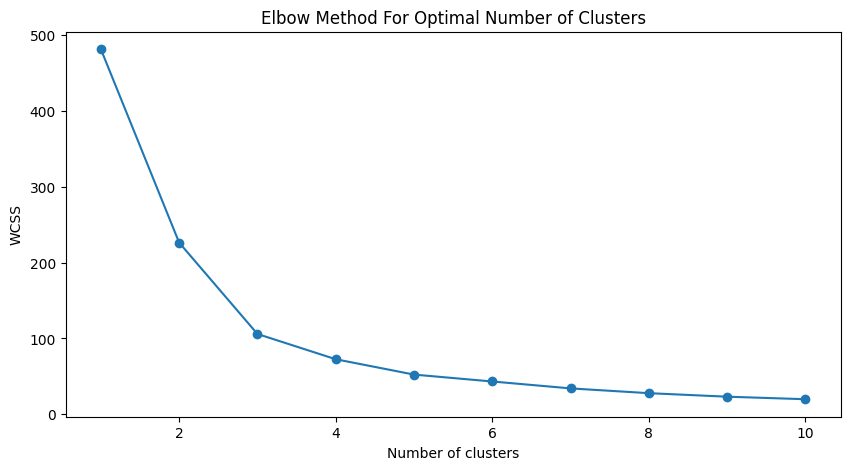

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


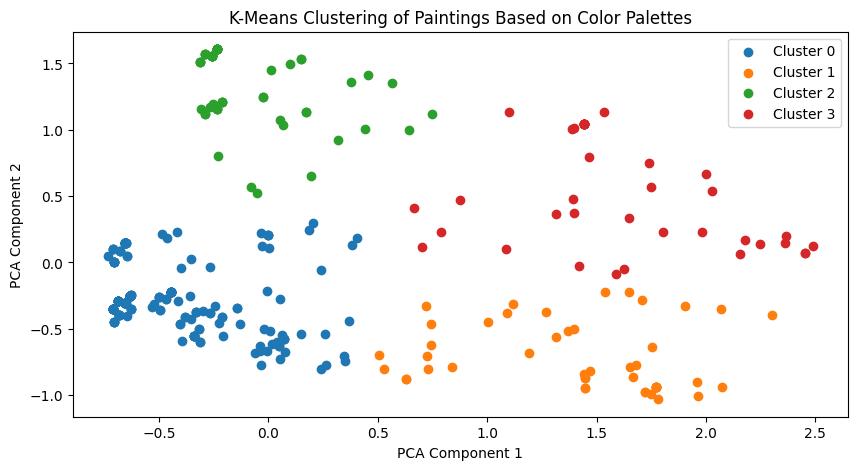

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

url = 'https://github.com/jwilber/Bob_Ross_Paintings/blob/master/data/bob_ross_paintings.csv?raw=true'
data = pd.read_csv(url)

data = data[['painting_title', 'season', 'episode', 'colors']]
data['colors'] = data['colors'].apply(lambda x: x.split(','))

mlb = MultiLabelBinarizer()
color_features = mlb.fit_transform(data['colors'])

pca = PCA(n_components=2)
color_features_pca = pca.fit_transform(color_features)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(color_features_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 4  # Assume 4 is the optimal number of clusters from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(color_features_pca)

data['cluster'] = clusters

plt.figure(figsize=(10, 5))
for i in range(optimal_clusters):
    plt.scatter(color_features_pca[clusters == i, 0], color_features_pca[clusters == i, 1], label=f'Cluster {i}')
plt.title('K-Means Clustering of Paintings Based on Color Palettes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

data.to_csv('/content/drive/MyDrive/bob_ross_paintings_clusters.csv', index=False)


**Graph 1**: The Elbow Method helps to determine the optimal number of clusters by plotting the WCSS against the number of clusters.
As the number of clusters increases, the WCSS decreases because the clusters become more compact.
The "elbow" point on the graph indicates the optimal number of clusters. This is the point where adding more clusters does not significantly reduce the WCSS further.
In this graph, the elbow point appears to be at k = 4, suggesting that 4 clusters might be the optimal choice.


**Graph 2**: This scatter plot shows the results of the k-means clustering algorithm, with the paintings grouped into 4 clusters based on the similarity of their color palettes.
The PCA transformation is used to visualize the data in 2D, making it easier to see the clustering patterns.
Each cluster is represented by a different color. Paintings within the same cluster have similar color palettes.
The separation between clusters indicates that the k-means algorithm has successfully grouped paintings with similar color palettes together.


## Generative


Question: "Can we create a model that generates Bob Ross-style paintings based on user input?"

Creating a model that generates Bob Ross’ painting based on user input
Example: User input: get me a painting with just trees and mountains during winter



### BLOCK 1

Basic static example of using pre-defined description to create a custom Bob Ross painting using "tree" "mountain" and "winter"


In [ ]:
!pip uninstall -y jax jaxlib
!pip install --upgrade "jax[cuda]"==0.3.25 -f https://storage.googleapis.com/jax-releases/jax_releases.html
!pip install jaxlib==0.3.25 -f https://storage.googleapis.com/jax-releases/jax_releases.html
!pip install dalle-mini
!pip install flax==0.5.0
!pip install transformers
!pip install git+https://github.com/patil-suraj/vqgan-jax.git
!pip install torch



Found existing installation: jax 0.3.25
Uninstalling jax-0.3.25:
  Successfully uninstalled jax-0.3.25
Found existing installation: jaxlib 0.4.26+cuda12.cudnn89
Uninstalling jaxlib-0.4.26+cuda12.cudnn89:
  Successfully uninstalled jaxlib-0.4.26+cuda12.cudnn89
  Using cached jax-0.3.25-py3-none-any.whl
ERROR: Could not find a version that satisfies the requirement jaxlib==0.3.25 (from versions: 0.4.6, 0.4.7, 0.4.9, 0.4.10, 0.4.11, 0.4.12, 0.4.13, 0.4.14, 0.4.16, 0.4.17, 0.4.18, 0.4.19, 0.4.20, 0.4.21, 0.4.22, 0.4.23, 0.4.24, 0.4.25, 0.4.26, 0.4.27, 0.4.28, 0.4.29, 0.4.30, 0.4.31)
ERROR: No matching distribution found for jaxlib==0.3.25
  Using cached jax-0.3.25-py3-none-any.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 MB 8.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is

In [ ]:
!pip install transformers
!pip install diffusers
!pip install torch
!pip install accelerate
!pip install safetensors


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 43.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

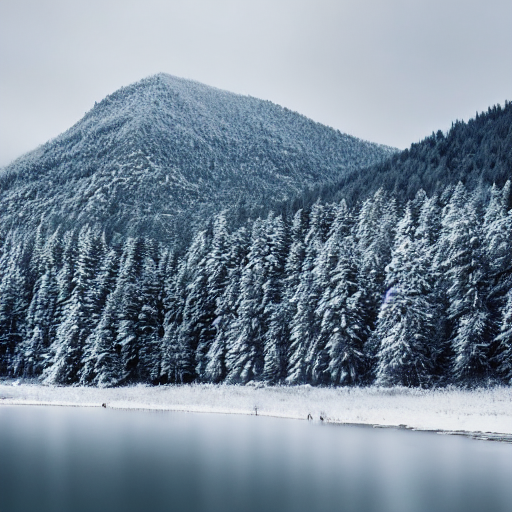

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import torch
from diffusers import StableDiffusionPipeline
from IPython.display import display

url = 'https://github.com/jwilber/Bob_Ross_Paintings/blob/master/data/bob_ross_paintings.csv?raw=true'
metadata = pd.read_csv(url)
metadata['description'] = metadata['colors'].astype(str) + ", " + metadata['season'].astype(str)

def preprocess_images(image_dir, metadata):
    images = []
    labels = []
    for index, row in metadata.iterrows():
        image_path = os.path.join(image_dir, row['painting_title'] + '.png')
        if os.path.exists(image_path):
            image = Image.open(image_path).resize((256, 256))
            images.append(np.array(image))
            labels.append(row['description'])
    return np.array(images), np.array(labels)

image_dir = 'images/'
images, descriptions = preprocess_images(image_dir, metadata)

label_encoder = LabelEncoder()
encoded_descriptions = label_encoder.fit_transform(descriptions)

model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

def generate_painting(description):
    image = pipe(description).images[0]
    return image

description = "trees, mountains, winter"
generated_image = generate_painting(description)

image_path = "generated_image.png"
generated_image.save(image_path)

display(Image.open(image_path))


### BLOCK 2


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter a description for the painting: get me a painting with just trees and mountains during winter


  0%|          | 0/50 [00:00<?, ?it/s]

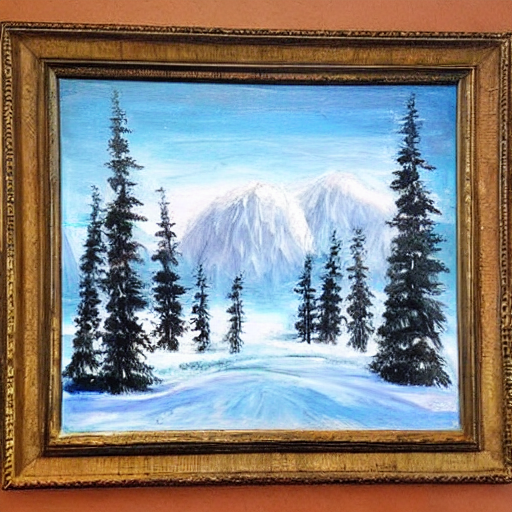

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import torch
from diffusers import StableDiffusionPipeline
from IPython.display import display

url = 'https://github.com/jwilber/Bob_Ross_Paintings/blob/master/data/bob_ross_paintings.csv?raw=true'
metadata = pd.read_csv(url)
metadata['description'] = metadata['colors'].astype(str) + ", " + metadata['season'].astype(str)

def preprocess_images(image_dir, metadata):
    images = []
    labels = []
    for index, row in metadata.iterrows():
        image_path = os.path.join(image_dir, row['painting_title'] + '.png')
        if os.path.exists(image_path):
            image = Image.open(image_path).resize((256, 256))
            images.append(np.array(image))
            labels.append(row['description'])
    return np.array(images), np.array(labels)

image_dir = 'images/'
images, descriptions = preprocess_images(image_dir, metadata)

label_encoder = LabelEncoder()
encoded_descriptions = label_encoder.fit_transform(descriptions)

model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

def generate_painting(description):
    image = pipe(description).images[0]
    return image

description = input("Enter a description for the painting: ")
generated_image = generate_painting(description)

image_path = "generated_image.png"
generated_image.save(image_path)
display(Image.open(image_path))


## Try yourself!

### Run dependencies first

In [ ]:
!pip uninstall -y jax jaxlib
!pip install --upgrade "jax[cuda]"==0.3.25 -f https://storage.googleapis.com/jax-releases/jax_releases.html
!pip install jaxlib==0.3.25 -f https://storage.googleapis.com/jax-releases/jax_releases.html
!pip install dalle-mini
!pip install flax==0.5.0
!pip install transformers
!pip install git+https://github.com/patil-suraj/vqgan-jax.git
!pip install torch
!pip install transformers
!pip install diffusers
!pip install torch
!pip install accelerate
!pip install safetensors



Found existing installation: jax 0.3.25
Uninstalling jax-0.3.25:
  Successfully uninstalled jax-0.3.25
Found existing installation: jaxlib 0.3.25
Uninstalling jaxlib-0.3.25:
  Successfully uninstalled jaxlib-0.3.25
Looking in links: https://storage.googleapis.com/jax-releases/jax_releases.html
  Using cached jax-0.3.25-py3-none-any.whl
INFO: pip is looking at multiple versions of jax[cuda] to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement jaxlib==0.3.25+cuda11.cudnn82; extra == "cuda" (from jax[cuda]) (from versions: 0.1.75, 0.1.76, 0.3.0, 0.3.2, 0.3.5, 0.3.7, 0.3.8, 0.3.10, 0.3.14, 0.3.15, 0.3.18, 0.3.20, 0.3.22, 0.3.24, 0.3.25, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.6, 0.4.7, 0.4.9, 0.4.10, 0.4.11, 0.4.12, 0.4.13, 0.4.14, 0.4.16, 0.4.17, 0.4.18, 0.4.19, 0.4.20, 0.4.21, 0.4.22, 0.4.23, 0.4.24, 0.4.25, 0.4.26, 0.4.27, 0.4.28, 0.4.29, 0.4.30, 0.4.31)
ERROR: No matching distribution found for

### Run code below

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import torch
from diffusers import StableDiffusionPipeline
from IPython.display import display

url = 'https://github.com/jwilber/Bob_Ross_Paintings/blob/master/data/bob_ross_paintings.csv?raw=true'
metadata = pd.read_csv(url)
metadata['description'] = metadata['colors'].astype(str) + ", " + metadata['season'].astype(str)

def preprocess_images(image_dir, metadata):
    images = []
    labels = []
    for index, row in metadata.iterrows():
        image_path = os.path.join(image_dir, row['painting_title'] + '.png')
        if os.path.exists(image_path):
            image = Image.open(image_path).resize((256, 256))
            images.append(np.array(image))
            labels.append(row['description'])
    return np.array(images), np.array(labels)

image_dir = 'images/'
images, descriptions = preprocess_images(image_dir, metadata)

label_encoder = LabelEncoder()
encoded_descriptions = label_encoder.fit_transform(descriptions)

model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

def generate_painting(description):
    image = pipe(description).images[0]
    return image

description = input("Enter a description for the painting: ")
generated_image = generate_painting(description)

image_path = "generated_image.png"
generated_image.save(image_path)
display(Image.open(image_path))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx